# Students Exam Performance
---

The data set below contains Students Exam Performance information.

Data Source:https://www.kaggle.com/spscientist/students-performance-in-exams

In [28]:
# Dependencies 
import pandas as pd
import numpy as np
import os
path = os.getcwd()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

In [29]:
# Create data frame from US Household Income Statistics
df = pd.read_csv('StudentsPerformance.csv')
print(len(df))

1000


In [30]:
# Display data structure information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Add file to SQLite DB

In [32]:
import sqlite3
conn = sqlite3.connect('students_performance.db')
c = conn.cursor()

# Create Table
conn.execute('''CREATE TABLE students (gender TEXT, race_ethnicity TEXT, parental_level_of_education TEXT, lunch TEXT, test_preparation_course TEXT, math_score INTEGER, reading_score INTEGER, writing_score INTEGER);''')

# Add dataframe to db
df.to_sql('students',con=conn,if_exists='append',index=False)

In [33]:
# Preview Data
pd.read_sql("Select * from students limit 10",conn)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## Average Male Scores

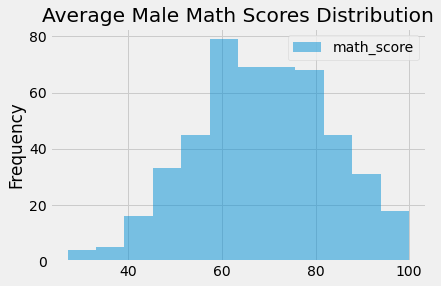

In [46]:
m_math_scores = pd.read_sql("Select math_score from students where gender = 'male' ",conn)
m_math_scores[['math_score']].plot.hist(bins=12, alpha=0.5)
plt.title('Average Male Math Scores Distribution')
plt.show()

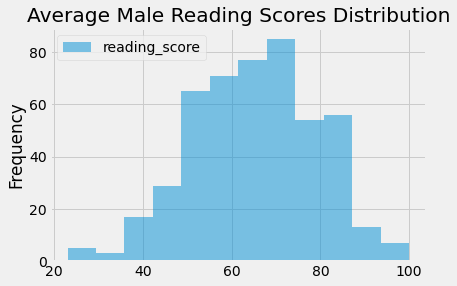

In [47]:
m_reading_scores = pd.read_sql("Select reading_score from students where gender = 'male' ",conn)
m_reading_scores[['reading_score']].plot.hist(bins=12, alpha=0.5)
plt.title('Average Male Reading Scores Distribution')
plt.show()

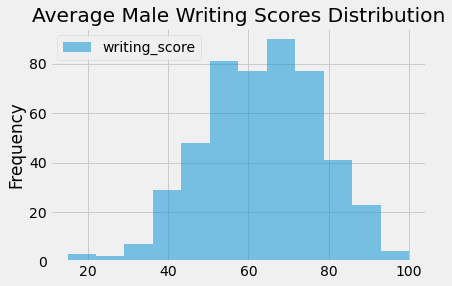

In [48]:
m_writing_scores = pd.read_sql("Select writing_score from students where gender = 'male' ",conn)
m_writing_scores[['writing_score']].plot.hist(bins=12, alpha=0.5)
plt.title('Average Male Writing Scores Distribution')
plt.show()

## Average Female Scores

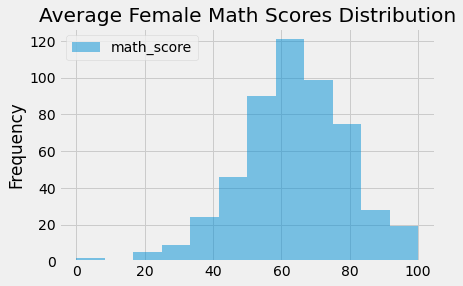

In [51]:
f_math_scores = pd.read_sql("Select math_score from students where gender = 'female' ",conn)
f_math_scores[['math_score']].plot.hist(bins=12, alpha=0.5)
plt.title('Average Female Math Scores Distribution')
plt.show()

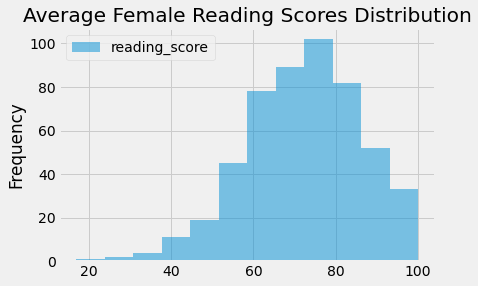

In [52]:
f_reading_scores = pd.read_sql("Select reading_score from students where gender = 'female' ",conn)
f_reading_scores[['reading_score']].plot.hist(bins=12, alpha=0.5)
plt.title('Average Female Reading Scores Distribution')
plt.show()

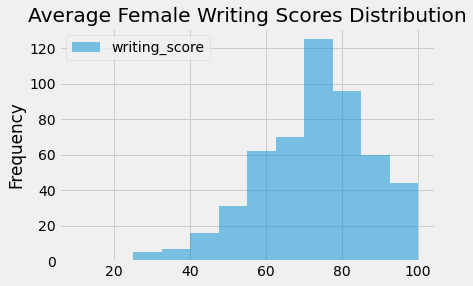

In [53]:
f_writing_scores = pd.read_sql("Select writing_score from students where gender = 'female' ",conn)
f_writing_scores[['writing_score']].plot.hist(bins=12, alpha=0.5)
plt.title('Average Female Writing Scores Distribution')
plt.show()

## Parental Level of Education

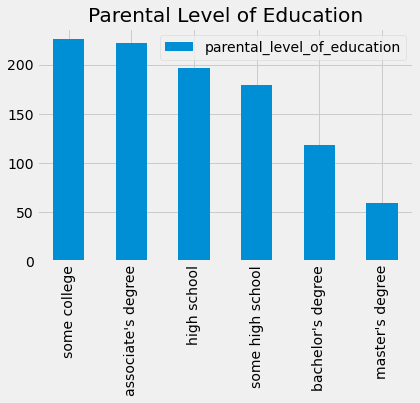

In [59]:
parent_edu = df['parental_level_of_education'].value_counts().to_frame()
parent_edu.plot(kind='bar')
plt.title('Parental Level of Education')
plt.show()

Average scores are generally higher for higher parental level of education 

In [69]:
df.groupby('parental_level_of_education').mean().sort_values('math_score',ascending=False)

,math_score,reading_score,writing_score
parental_level_of_education,,,
master's degree,69.745763,75.372881,75.677966
bachelor's degree,69.389831,73.000000,73.381356
associate's degree,67.882883,70.927928,69.896396
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268
high school,62.137755,64.704082,62.448980


## Race / Ethnicity

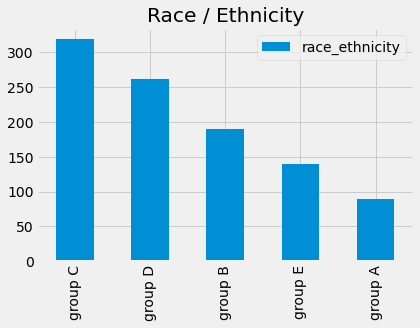

In [70]:
race_ethnicity = df['race_ethnicity'].value_counts().to_frame()
race_ethnicity.plot(kind='bar')
plt.title('Race / Ethnicity')
plt.show()

Average Scores are generally higher for Group E

In [71]:
df.groupby('race_ethnicity').mean().sort_values('math_score',ascending=False)

,math_score,reading_score,writing_score
race_ethnicity,,,
group E,73.821429,73.028571,71.407143
group D,67.362595,70.030534,70.145038
group C,64.463950,69.103448,67.827586
group B,63.452632,67.352632,65.600000
group A,61.629213,64.674157,62.674157


## Test Preparation Course

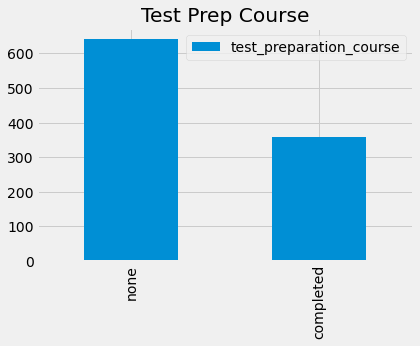

In [72]:
test_prep = df['test_preparation_course'].value_counts().to_frame()
test_prep.plot(kind='bar')
plt.title('Test Prep Course')
plt.show()

Average scores are generally higher for students who have completed a prep course

In [73]:
df.groupby('test_preparation_course').mean().sort_values('math_score',ascending=False)

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


## Lunch

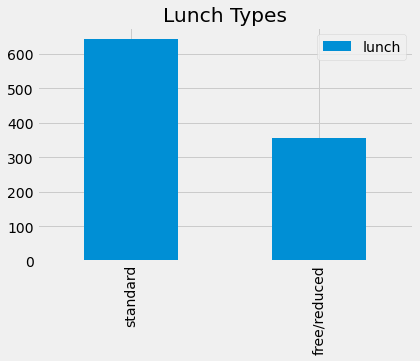

In [74]:
test_prep = df['lunch'].value_counts().to_frame()
test_prep.plot(kind='bar')
plt.title('Lunch Types')
plt.show()

Average Scores are higher for students with a standard lunch

In [75]:
df.groupby('lunch').mean().sort_values('math_score',ascending=False)

,math_score,reading_score,writing_score
lunch,,,
standard,70.034109,71.654264,70.823256
free/reduced,58.921127,64.653521,63.022535
